## Import libs

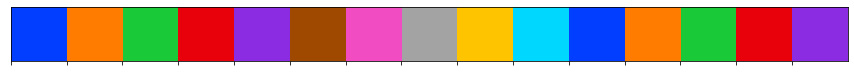

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

from colorama import Fore, Back, Style
red = Fore.RED
grn = Fore.GREEN
blu = Fore.BLUE
ylw = Fore.YELLOW
wht = Fore.WHITE
mag = Fore.MAGENTA

palette = sns.color_palette("bright",15)
sns.palplot(palette)
sns.set_palette("Paired")

import warnings
warnings.filterwarnings('ignore')

## Import Kaggle data books

In [4]:
dfBooks = pd.read_csv(r'C:\Users\ivair\OneDrive\DH_Oficial\Books.csv',low_memory=False)
dfUsers = pd.read_csv('Ratings.csv',low_memory=False)
dfRating = pd.read_csv('Users.csv',low_memory=False)

dfBooks.head(1)

author bookformat  \
0  Laurence M. Hauptman  Hardcover   

                                                desc  \
0  Reveals that several hundred thousand Indians ...   

                                               genre  \
0  History,Military History,Civil War,American Hi...   

                                                 img        isbn    isbn13  \
0  https://i.gr-assets.com/images/S/compressed.ph...  002914180X  9.78E+12   

                                                link  pages  rating  reviews  \
0  https://goodreads.com/book/show/1001053.Betwee...      0    3.52        5   

                                               title  totalratings  
0  Between Two Fires: American Indians in the Civ...            33

## Formatting

In [6]:
dfBooks['isbn'] = dfBooks['isbn'].str.zfill(10)

In [11]:
def clean(feature):
    cleaned_feature = list()
    for feat in dfBooks[feature]:
        if len(feat.split(',')) > 1:
            temp = feat.split(',')
            for a in temp:
                cleaned_feature.append(a)
        else:
            cleaned_feature.append(feat)
    return cleaned_feature

In [8]:
def plot_barplot(x,y,df):
    sns.set(style = 'darkgrid',font_scale=0.25,rc={"grid.linewidth": 0.2});
    plt.figure(dpi=250);
    sns.barplot(y=y,x=x,
                palette=palette, 
                edgecolor=".9",
                data=df );
    plt.legend(title=f'{x} by {y}', fontsize='10', title_fontsize='14');

In [9]:
def plot_distribution(data,feat,color,alpha=1):
    sns.set(font_scale=1);
    sns.displot(dfBooks[feat],color=color,kde=True,aspect=15/10,alpha = alpha,);
    print(f'{red}Max value of {feat} is {dfBooks[feat].max()}\n{blu}Min value of {feat} is {dfBooks[feat].min()}\n{grn}Std value of {feat} is {data[feat].std()}\n{ylw}Mean value of {feat} is {data[feat].mean()}\n{mag}Median value of {feat} is {data[feat].median()}')

## Analysis

>## Authors

In [12]:
all_authors = clean('author')
authors = pd.DataFrame(all_authors, columns = ['authors'])
author_counts = authors.value_counts()
authors['books_count'] = authors['authors'].apply(lambda x: author_counts[x])
sorted_authors = authors.sort_values(by='books_count',ascending=False)
sorted_authors = sorted_authors.drop_duplicates(['authors'])
sorted_authors = sorted_authors.reset_index(drop = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


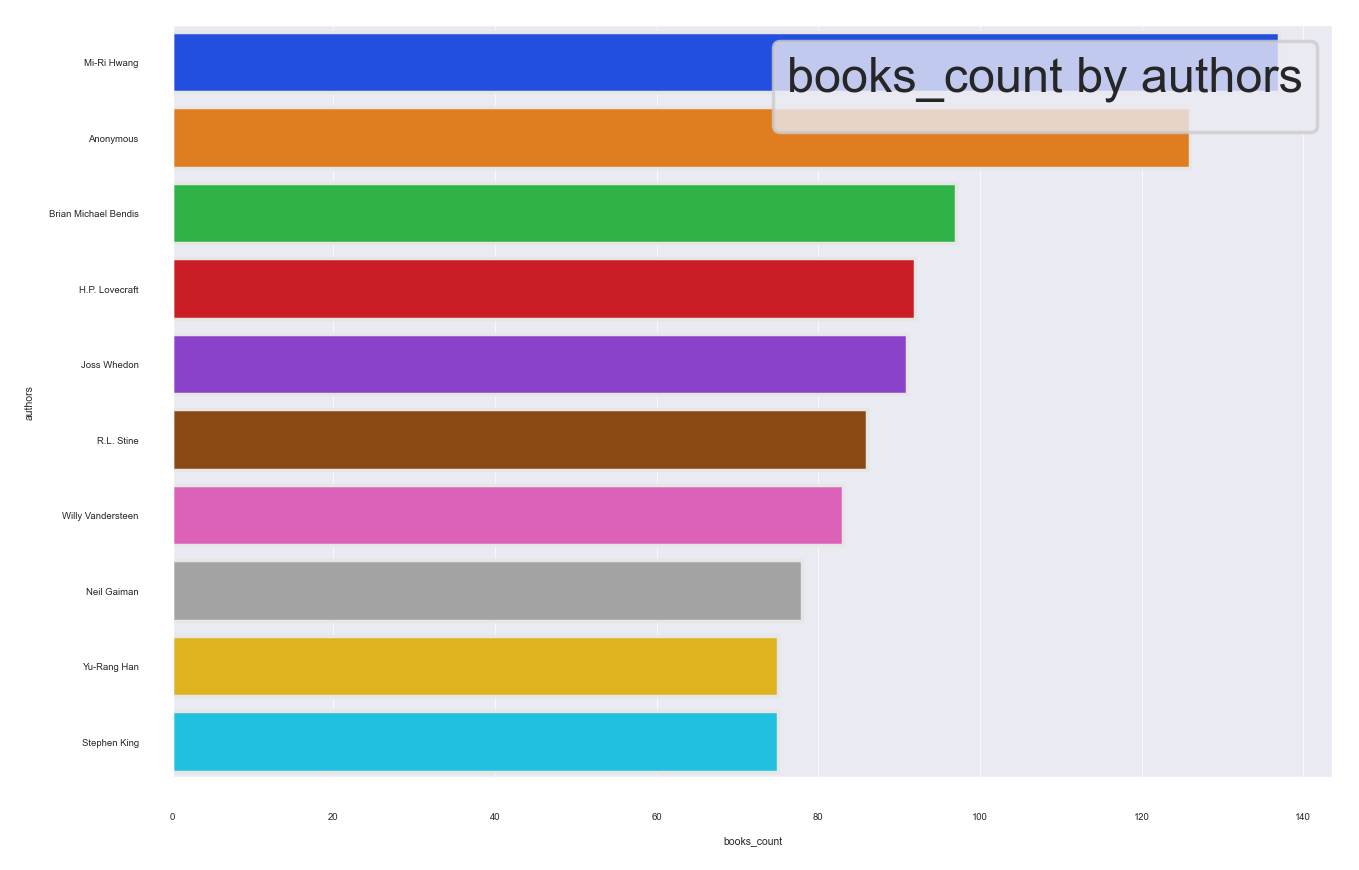

In [13]:
plot_barplot('books_count','authors',sorted_authors[:10])

Max value of books_count is 137
Min value of books_count is 11
Std value of books_count is 11.54358719832811
Mean value of books_count is 18.293
Median value of books_count is 14.0


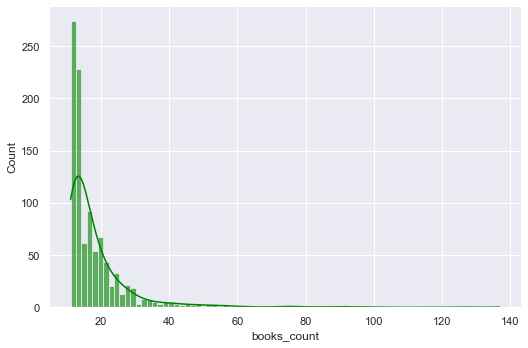

In [14]:
plot_distribution(sorted_authors[:1000],'books_count','green',0.6);

>## Formato Livro

In [15]:
book_format = pd.DataFrame(dfBooks['bookformat'].values, columns = ['format'])
book_format['format'] = book_format['format'].fillna('None')
format_counts = book_format['format'].value_counts()
book_format['format_count'] = book_format['format'].apply(lambda x: format_counts[x])
sorted_format = book_format.sort_values(by='format_count',ascending=False)
sorted_format = sorted_format.drop_duplicates(['format'])
sorted_format = sorted_format.reset_index(drop = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


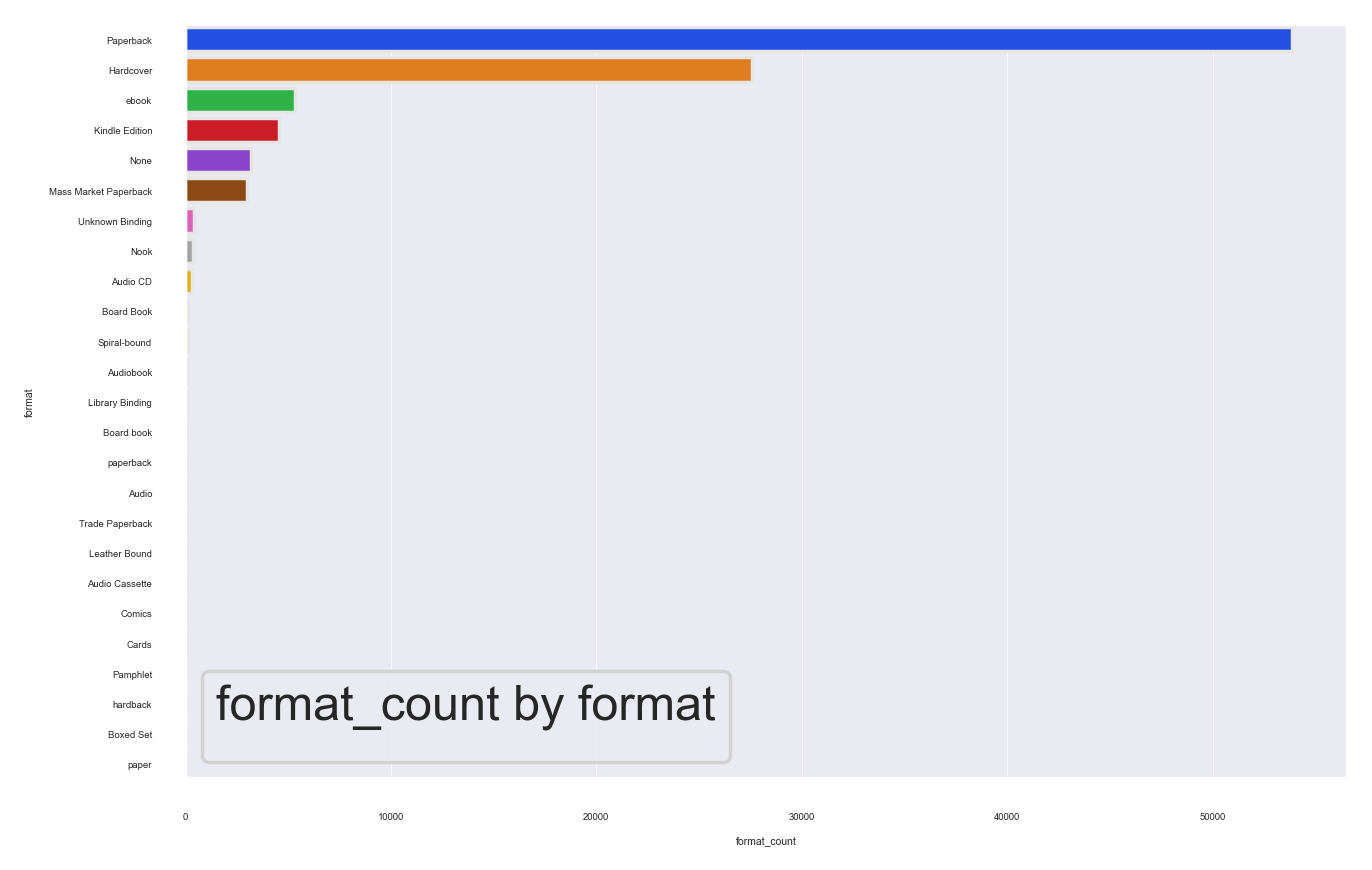

In [16]:
plot_barplot('format_count','format',sorted_format[:25])

Max value of format_count is 53855
Min value of format_count is 14
Std value of format_count is 11786.165697262759
Mean value of format_count is 3982.48
Median value of format_count is 69.0


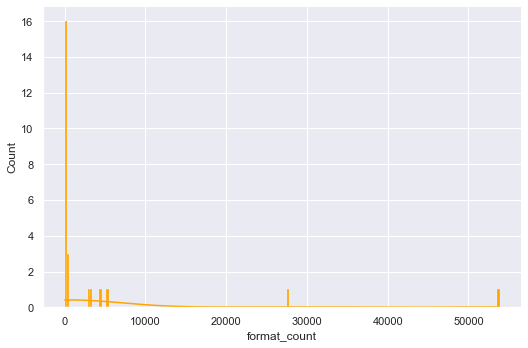

In [17]:
plot_distribution(sorted_format[:25],'format_count','orange');

>## Genero

In [19]:
dfBooks['genre'] = dfBooks['genre'].fillna('None')
all_genres = clean('genre')
genres = pd.DataFrame(all_genres, columns = ['genres'])
genre_counts = genres.value_counts()
genres['genre_count'] = genres['genres'].apply(lambda x: genre_counts[x])
sorted_genres = genres.sort_values(by='genre_count',ascending=False)
sorted_genres = sorted_genres.drop_duplicates(['genres'])
sorted_genres = sorted_genres.reset_index(drop = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


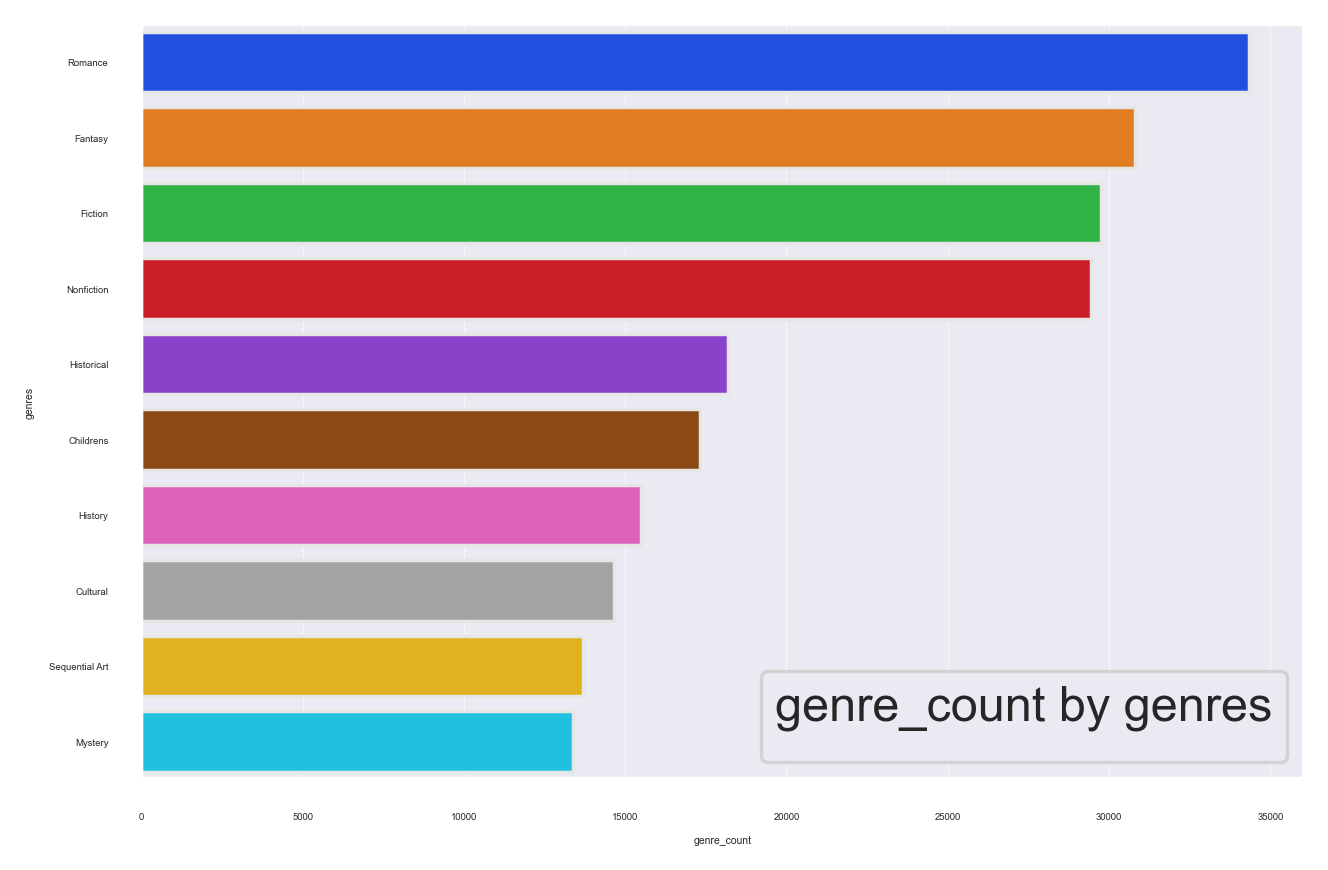

In [21]:
plot_barplot('genre_count','genres',sorted_genres[:10])

Max value of genre_count is 34324
Min value of genre_count is 1345
Std value of genre_count is 5995.688840041367
Mean value of genre_count is 5257.575
Median value of genre_count is 3043.5


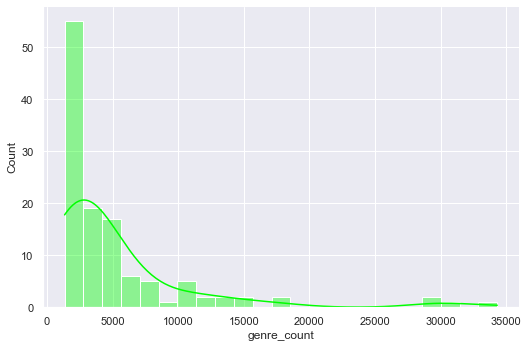

In [22]:
plot_distribution(sorted_genres[:120],'genre_count','lime',0.4);

>## AVG Rating

Max value of rating is 5.0
Min value of rating is 0.0
Std value of rating is 0.6212374563021322
Mean value of rating is 3.8330552000000613
Median value of rating is 3.91


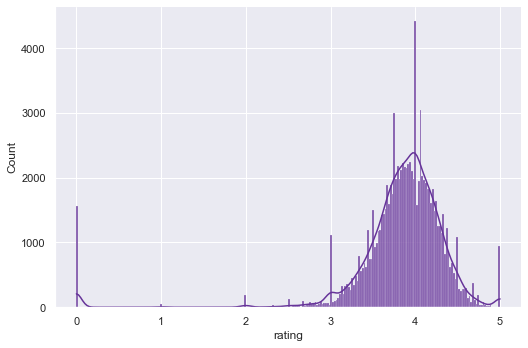

In [24]:
plot_distribution(dfBooks,'rating','rebeccapurple',0.8);

>## Reviews

In [28]:
division_factor = 1500
steps = int(dfBooks['reviews'].max() // division_factor)
bins = np.linspace(dfBooks['reviews'].min(),dfBooks['reviews'].max(), steps, dtype = int)

In [30]:
reviews = pd.DataFrame(pd.cut(dfBooks['reviews'],bins = bins).values, columns = ['reviews_bins'])
reviews_counts = reviews['reviews_bins'].value_counts()
reviews['review_count'] = reviews['reviews_bins'].apply(lambda x: reviews_counts[x])
sorted_reviews = reviews.sort_values(by='review_count',ascending=False)
sorted_reviews = sorted_reviews.drop_duplicates(['reviews_bins'])
sorted_reviews = sorted_reviews[sorted_reviews['review_count'] !=0]
sorted_reviews = sorted_reviews.reset_index(drop = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


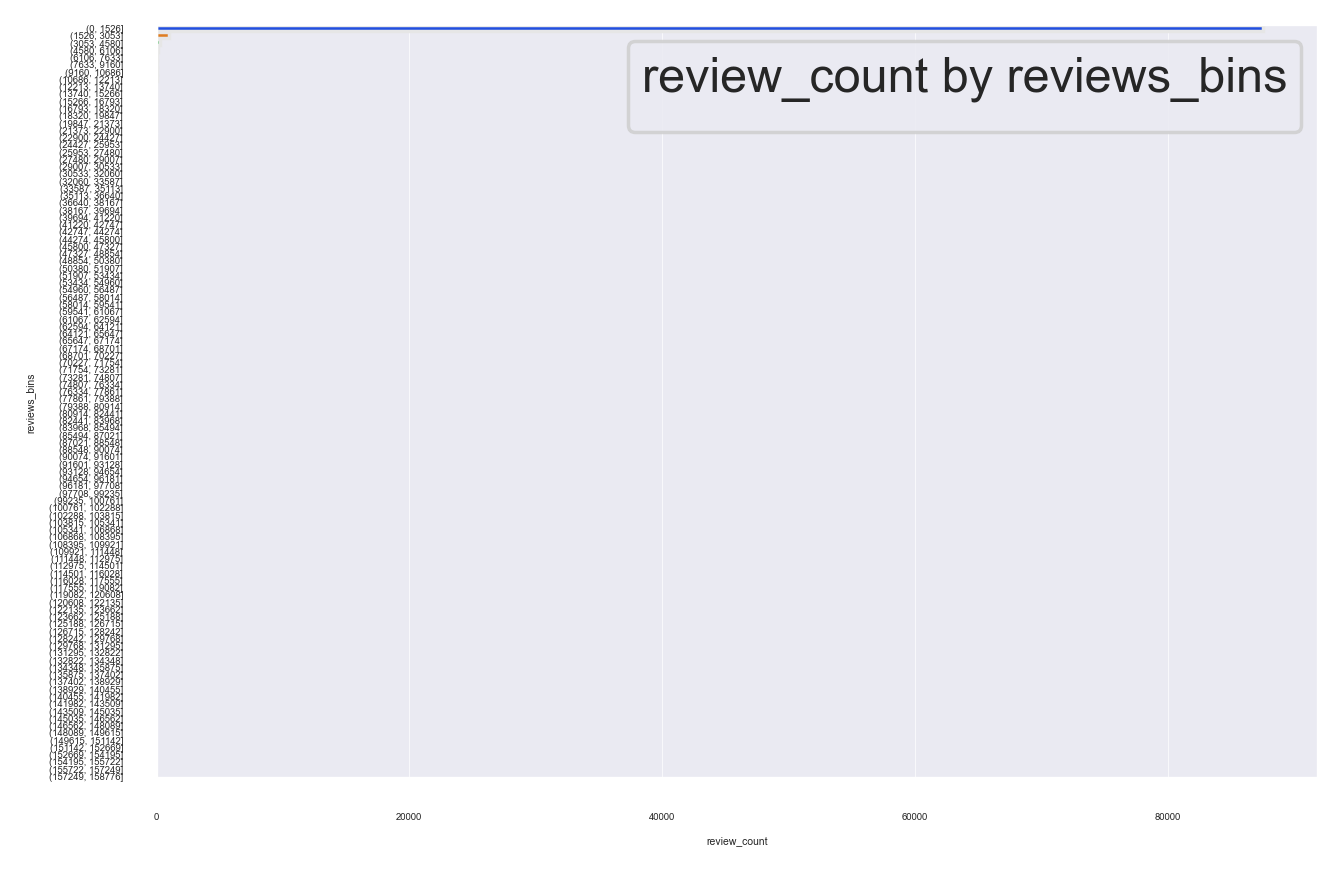

In [31]:
plot_barplot('review_count','reviews_bins',sorted_reviews)

A maioria dos comentários está na faixa de 0-1500.. vamos dividir da mesma forma que fizemos com as páginas

In [33]:
division_factor = 100
steps = int(3000 // division_factor)
bins = np.linspace(dfBooks['reviews'].min(),3000, steps, dtype = int)

In [35]:
new_reviews = pd.DataFrame(pd.cut(dfBooks['reviews'][dfBooks['reviews'] < 3000],bins = bins).values, columns = ['new_reviews_bins'])
new_reviews_counts = new_reviews['new_reviews_bins'].value_counts() 
new_reviews['review_count'] = new_reviews['new_reviews_bins'].apply(lambda x: new_reviews_counts[x]).astype(float)
sorted_new_reviews = new_reviews.sort_values(by='review_count',ascending=False)
sorted_new_reviews = sorted_new_reviews.drop_duplicates(['new_reviews_bins'])
sorted_new_reviews = sorted_new_reviews.reset_index(drop = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


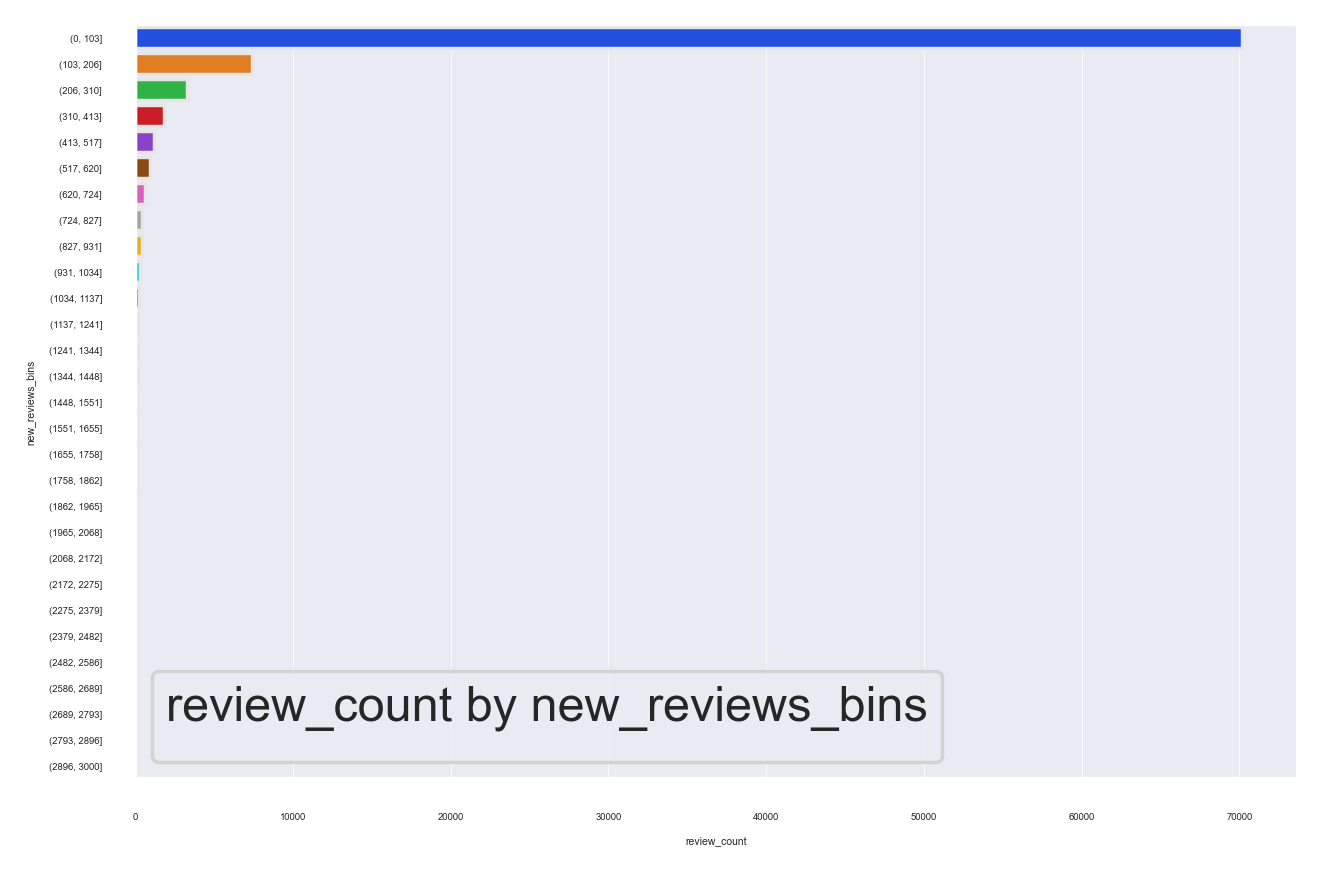

In [36]:
plot_barplot('review_count','new_reviews_bins',sorted_new_reviews)